In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sb

from steves_utils.ptn_do_report import (
    get_loss_curve,
)


from steves_utils.summary_utils import (
    get_experiments_from_path
)

from steves_utils.utils_v2 import (
    get_experiments_base_path
)

In [2]:
trials = get_experiments_from_path(
    os.path.join(get_experiments_base_path(), "hyperparameters_3/nWay")
)

all_trials = pd.DataFrame(columns=[
    "source_val_label_accuracy",
    "source_val_label_loss",
    "target_val_label_accuracy",
    "target_val_label_loss",
    "total_epochs_trained",
    "total_experiment_time_secs",
    "n_way",
])

for trial in trials:
    f = pd.DataFrame(trial["results"])
    f["n_way"] = trial["parameters"]["n_way"]
    f = f[all_trials.columns]

    f = f.iloc[0] # Unknown why, but pandas is repeating trials for each domain in the trial!


    all_trials = all_trials.append(f)
    
all_trials = all_trials.reset_index(drop=True)
all_trials

,source_val_label_accuracy,source_val_label_loss,target_val_label_accuracy,target_val_label_loss,total_epochs_trained,total_experiment_time_secs,n_way
0,0.824088,0.473720,0.693297,0.887452,11.0,184.997943,10.0
1,0.897695,0.257854,0.807455,0.617650,11.0,240.020117,5.0
2,0.927650,0.188499,0.901965,0.255778,15.0,585.421455,2.0
3,0.770660,0.610240,0.622708,1.204355,12.0,178.175243,16.0


In [3]:
g = all_trials.groupby("n_way")[[
    "source_val_label_accuracy",
    "target_val_label_accuracy",
]].mean()
g

,source_val_label_accuracy,target_val_label_accuracy
n_way,,
2.0,0.927650,0.901965
5.0,0.897695,0.807455
10.0,0.824088,0.693297
16.0,0.770660,0.622708


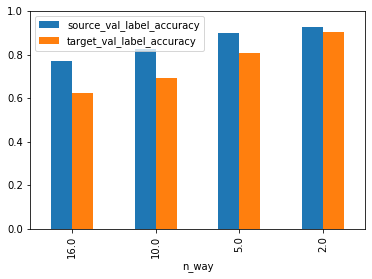

In [4]:
ax = all_trials.groupby("n_way")[[
    "source_val_label_accuracy",
    "target_val_label_accuracy"
]].mean().sort_values("n_way", ascending=False).plot(kind="bar")

ax.set_ylim(0,1)
ax